# Flight Price Prediction
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Importing dataset

1. Since data is in form of excel file we have to use pandas read_excel to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3. Check whether any null values are there or not. if it is present then following can be done,
    1. Imputing data using Imputation method in sklearn
    2. Filling NaN values with mean, median and mode using fillna() method
4. Describe data --> which can give statistical analysis

In [4]:
!pip install vaex

  Using cached cloudpickle-1.6.0-py3-none-any.whl (23 kB)
  Using cached psutil-5.8.0-cp36-cp36m-win_amd64.whl (244 kB)
  Using cached future-0.18.2-py3-none-any.whl
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Using cached cached_property-1.5.2-py2.py3-none-any.whl (7.6 kB)
  Using cached ipywidgets-7.6.3-py2.py3-none-any.whl (121 kB)
  Using cached widgetsnbextension-3.5.1-py2.py3-none-any.whl (2.2 MB)
  Using cached jupyterlab_widgets-1.0.0-py3-none-any.whl (243 kB)
  Created wheel for aplus: filename=aplus-0.11.0-py3-none-any.whl size=4411 sha256=da256c30ffb9732ce4b90d6ea71dc1ca1f1e4071155fda18d5e07c8c66238edb
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\8c\77\db\b10ae52c0d74ee49eaa6a4025cc0faddb4b6318197b17d155e
Successfully built aplus


In [2]:
train_data = pd.read_excel("Data_Train.xlsx", sheet_name='Sheet1',engine = 'openpyxl')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data[train_data.isnull().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
train_data.dropna(inplace = True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data[train_data.isnull().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


---

## EDA

From description we can see that Date_of_Journey is a object data type,\
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas **to_datetime** to convert object data type to datetime dtype.

<span style="color: red;">**.dt.day method will extract only day of that date**</span>\
<span style="color: red;">**.dt.month method will extract only month of that date**</span>

In [11]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
def change_to_datetime(column):
        train_data[column] = pd.to_datetime(train_data[column])

In [13]:
for column in ['Date_of_Journey', 'Arrival_Time', 'Dep_Time']:
    change_to_datetime(column)

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [15]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-06-02 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-02 05:50:00,2021-06-02 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-02 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-06-02 18:05:00,2021-06-02 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-06-02 16:50:00,2021-06-02 21:35:00,4h 45m,1 stop,No info,13302


In [16]:
def extract_month(col):
    train_data[col+'_month'] = train_data[col].dt.month
def extract_day(col):
    train_data[col+'_day'] = train_data[col].dt.day
def extract_hour(col):
    train_data[col+'_hour'] = train_data[col].dt.hour
def extract_minute(col):
    train_data[col+'_minute'] = train_data[col].dt.minute    

In [17]:
extract_day('Date_of_Journey')
extract_month('Date_of_Journey')

In [18]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-06-02 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-02 05:50:00,2021-06-02 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-02 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-06-02 18:05:00,2021-06-02 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-06-02 16:50:00,2021-06-02 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [19]:
extract_hour('Arrival_Time')
extract_minute('Arrival_Time')
extract_hour('Dep_Time')
extract_minute('Dep_Time')

In [20]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-06-02 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-02 05:50:00,2021-06-02 13:15:00,7h 25m,2 stops,No info,7662,5,1,13,15,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-02 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,4,25,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-06-02 18:05:00,2021-06-02 23:30:00,5h 25m,1 stop,No info,6218,5,12,23,30,18,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-06-02 16:50:00,2021-06-02 21:35:00,4h 45m,1 stop,No info,13302,3,1,21,35,16,50


In [21]:
duration = list(train_data['Duration'])
for rec in range(len(duration)):
    if len(duration[rec].split(' ')) != 2:
        if 'h' in duration[rec]:
            duration[rec] = duration[rec] + ' 0m'
        else:
            duration[rec] = '0h ' + duration[rec]

In [22]:
train_data['Duration'] = duration

In [23]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-06-02 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-02 05:50:00,2021-06-02 13:15:00,7h 25m,2 stops,No info,7662,5,1,13,15,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-02 09:25:00,2021-06-10 04:25:00,19h 0m,2 stops,No info,13882,6,9,4,25,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-06-02 18:05:00,2021-06-02 23:30:00,5h 25m,1 stop,No info,6218,5,12,23,30,18,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-06-02 16:50:00,2021-06-02 21:35:00,4h 45m,1 stop,No info,13302,3,1,21,35,16,50


In [24]:
def hour(column):
    return column.split(' ')[0][0:-1]

def minute(column):
    return column.split(' ')[1][0:-1]

In [25]:
train_data['Duration_hours'] = train_data['Duration'].apply(hour)
train_data['Duration_minutes'] = train_data['Duration'].apply(minute)

In [26]:
train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_minutes']=train_data['Duration_minutes'].astype(int)

In [27]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-06-02 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-02 05:50:00,2021-06-02 13:15:00,7h 25m,2 stops,No info,7662,5,1,13,15,5,50,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-02 09:25:00,2021-06-10 04:25:00,19h 0m,2 stops,No info,13882,6,9,4,25,9,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-06-02 18:05:00,2021-06-02 23:30:00,5h 25m,1 stop,No info,6218,5,12,23,30,18,5,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-06-02 16:50:00,2021-06-02 21:35:00,4h 45m,1 stop,No info,13302,3,1,21,35,16,50,4,45


In [28]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date_of_Journey_day',
       'Date_of_Journey_month', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Dep_Time_hour', 'Dep_Time_minute', 'Duration_hours',
       'Duration_minutes'],
      dtype='object')

In [29]:
train_data.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration'],axis=1,inplace=True)

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Airline                10682 non-null  object
 1   Source                 10682 non-null  object
 2   Destination            10682 non-null  object
 3   Route                  10682 non-null  object
 4   Total_Stops            10682 non-null  object
 5   Additional_Info        10682 non-null  object
 6   Price                  10682 non-null  int64 
 7   Date_of_Journey_day    10682 non-null  int64 
 8   Date_of_Journey_month  10682 non-null  int64 
 9   Arrival_Time_hour      10682 non-null  int64 
 10  Arrival_Time_minute    10682 non-null  int64 
 11  Dep_Time_hour          10682 non-null  int64 
 12  Dep_Time_minute        10682 non-null  int64 
 13  Duration_hours         10682 non-null  int32 
 14  Duration_minutes       10682 non-null  int32 
dtypes: int32(2), int64(

---

## Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [31]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

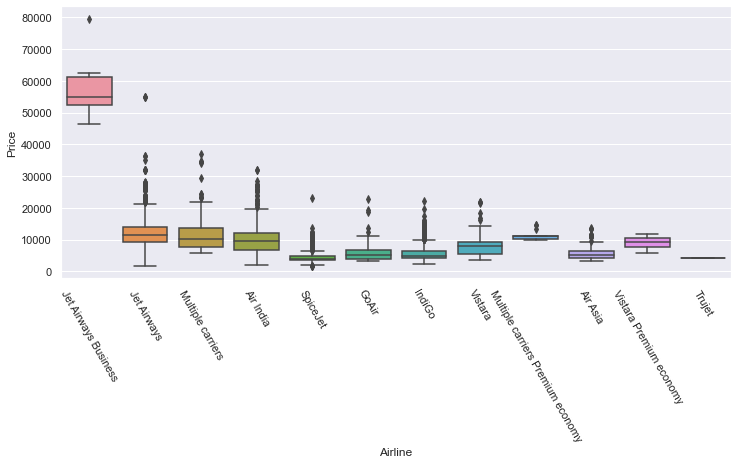

In [32]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Airline',y='Price',data = train_data.sort_values('Price',ascending=False))
plt.xticks(rotation=-60)
plt.show()

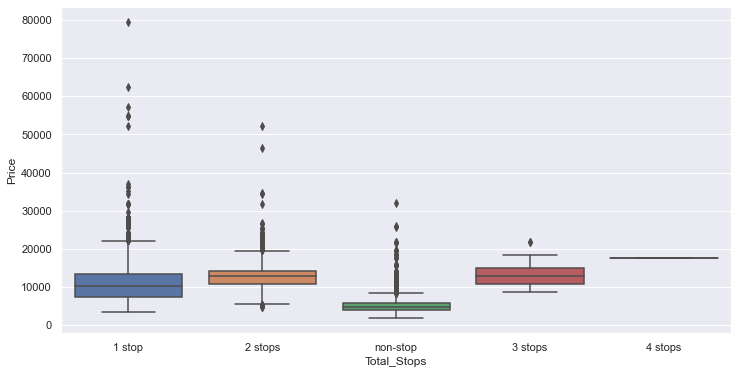

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Total_Stops',y='Price',data = train_data.sort_values('Price',ascending=False))
plt.show()

<Figure size 864x1728 with 0 Axes>

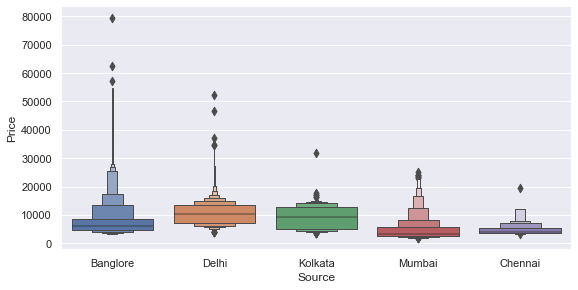

In [34]:
plt.figure(figsize=(12,24))
sns.catplot(x='Source',y='Price',data = train_data.sort_values('Price',ascending=False),kind='boxen',height = 4, aspect = 2)
plt.show()

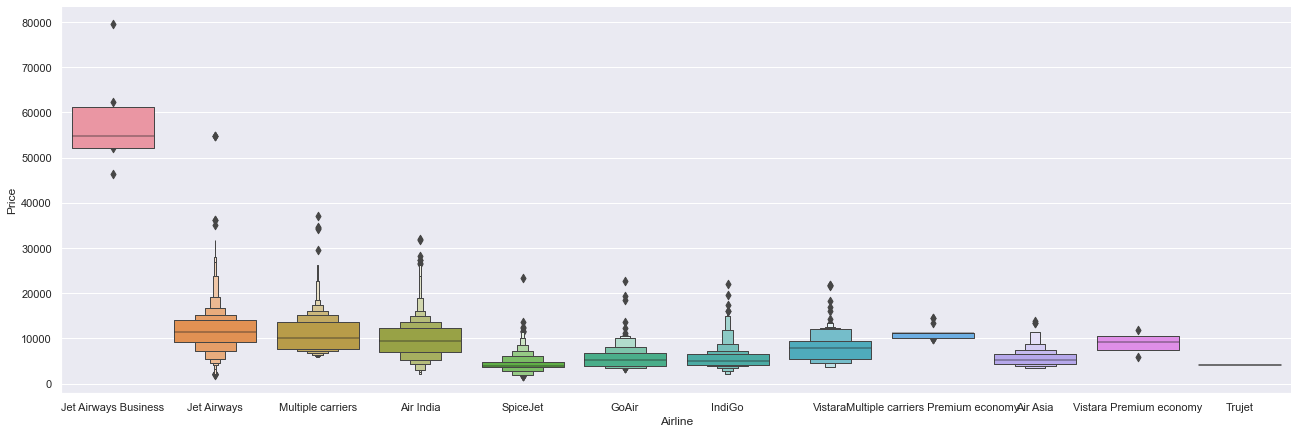

In [35]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [36]:
Airline = pd.get_dummies(train_data['Airline'],drop_first=True,prefix='Airline',prefix_sep='|')

In [37]:
Airline

,Airline|Air India,Airline|GoAir,Airline|IndiGo,Airline|Jet Airways,Airline|Jet Airways Business,Airline|Multiple carriers,Airline|Multiple carriers Premium economy,Airline|SpiceJet,Airline|Trujet,Airline|Vistara,Airline|Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [38]:
Airline.columns = [column.replace(' ','_') for column in Airline.columns]
Airline

,Airline|Air_India,Airline|GoAir,Airline|IndiGo,Airline|Jet_Airways,Airline|Jet_Airways_Business,Airline|Multiple_carriers,Airline|Multiple_carriers_Premium_economy,Airline|SpiceJet,Airline|Trujet,Airline|Vistara,Airline|Vistara_Premium_economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [39]:
Source = pd.get_dummies(train_data['Source'],drop_first=True,prefix='Source',prefix_sep='|')
Source

,Source|Chennai,Source|Delhi,Source|Kolkata,Source|Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [40]:
train_data.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [41]:
Destination = pd.get_dummies(train_data['Destination'],drop_first=True,prefix='Destination',prefix_sep='|')
Destination

,Destination|Cochin,Destination|Delhi,Destination|Hyderabad,Destination|Kolkata,Destination|New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [42]:
train_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [43]:
dict = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [44]:
train_data['Total_Stops'] = train_data['Total_Stops'].map(dict)

In [45]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [46]:
train_data['Route1'] = train_data['Route'].str.split('→').str[0]
train_data['Route2'] = train_data['Route'].str.split('→').str[1]
train_data['Route3'] = train_data['Route'].str.split('→').str[2]
train_data['Route4'] = train_data['Route'].str.split('→').str[3]
train_data['Route5'] = train_data['Route'].str.split('→').str[4]
train_data['Route6'] = train_data['Route'].str.split('→').str[5]

In [47]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_minutes,Route1,Route2,Route3,Route4,Route5,Route6
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,1,10,22,20,2,50,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,13,15,5,50,7,25,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,4,25,9,25,19,0,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,5,12,23,30,18,5,5,25,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,3,1,21,35,16,50,4,45,BLR,NAG,DEL,NaN,NaN,NaN


In [48]:
train_data['Route1'].fillna('None',inplace=True)
train_data['Route2'].fillna('None',inplace=True)
train_data['Route3'].fillna('None',inplace=True)
train_data['Route4'].fillna('None',inplace=True)
train_data['Route5'].fillna('None',inplace=True)
train_data['Route6'].fillna('None',inplace=True)

In [49]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_minutes,Route1,Route2,Route3,Route4,Route5,Route6
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,1,10,22,20,2,50,BLR,DEL,None,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,13,15,5,50,7,25,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,4,25,9,25,19,0,DEL,LKO,BOM,COK,None,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,5,12,23,30,18,5,5,25,CCU,NAG,BLR,None,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,3,1,21,35,16,50,4,45,BLR,NAG,DEL,None,None,None


In [50]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [51]:
for column in ['Route1','Route2','Route3','Route4','Route5','Route6']:
    train_data[column] = encoder.fit_transform(train_data[column])

In [52]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_minutes,Route1,Route2,Route3,Route4,Route5,Route6
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,1,10,22,20,2,50,0,13,29,13,5,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,13,15,5,50,7,25,2,25,1,3,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,4,25,9,25,19,0,3,32,4,5,5,1
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,5,12,23,30,18,5,5,25,2,34,3,13,5,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,3,1,21,35,16,50,4,45,0,34,8,13,5,1


In [53]:
train_data.drop(['Airline','Source','Destination','Additional_Info'], axis=1, inplace=True)

In [54]:
train_data.drop('Route',axis=1,inplace=True)

In [55]:
data_train = pd.concat([Airline, Source, Destination,train_data],axis=1)
data_train.head()

,Airline|Air_India,Airline|GoAir,Airline|IndiGo,Airline|Jet_Airways,Airline|Jet_Airways_Business,Airline|Multiple_carriers,Airline|Multiple_carriers_Premium_economy,Airline|SpiceJet,Airline|Trujet,Airline|Vistara,Airline|Vistara_Premium_economy,Source|Chennai,Source|Delhi,Source|Kolkata,Source|Mumbai,Destination|Cochin,Destination|Delhi,Destination|Hyderabad,Destination|Kolkata,Destination|New Delhi,Total_Stops,Price,Date_of_Journey_day,Date_of_Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_minutes,Route1,Route2,Route3,Route4,Route5,Route6
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3897,24,3,1,10,22,20,2,50,0,13,29,13,5,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,7662,5,1,13,15,5,50,7,25,2,25,1,3,5,1
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,13882,6,9,4,25,9,25,19,0,3,32,4,5,5,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,6218,5,12,23,30,18,5,5,25,2,34,3,13,5,1
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,13302,3,1,21,35,16,50,4,45,0,34,8,13,5,1


---

In [56]:
data_train.columns = [column.replace(' ','_') for column in data_train.columns]
data_train.columns

Index(['Airline|Air_India', 'Airline|GoAir', 'Airline|IndiGo',
       'Airline|Jet_Airways', 'Airline|Jet_Airways_Business',
       'Airline|Multiple_carriers',
       'Airline|Multiple_carriers_Premium_economy', 'Airline|SpiceJet',
       'Airline|Trujet', 'Airline|Vistara', 'Airline|Vistara_Premium_economy',
       'Source|Chennai', 'Source|Delhi', 'Source|Kolkata', 'Source|Mumbai',
       'Destination|Cochin', 'Destination|Delhi', 'Destination|Hyderabad',
       'Destination|Kolkata', 'Destination|New_Delhi', 'Total_Stops', 'Price',
       'Date_of_Journey_day', 'Date_of_Journey_month', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hours', 'Duration_minutes', 'Route1', 'Route2', 'Route3',
       'Route4', 'Route5', 'Route6'],
      dtype='object')

## Outlier Detection

In [57]:
def plot(df,col):
    fig,(ax1,ax2) = plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

E:\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\ProgramFiles\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1296x432 with 0 Axes>

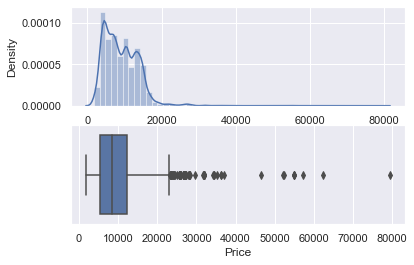

In [58]:
plt.figure(figsize=(18,6))
plot(data_train,'Price')
plt.show()

In [59]:
data_train['Price'] = np.where(data_train['Price']>40000,data_train['Price'].median(),data_train['Price'])

E:\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\ProgramFiles\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


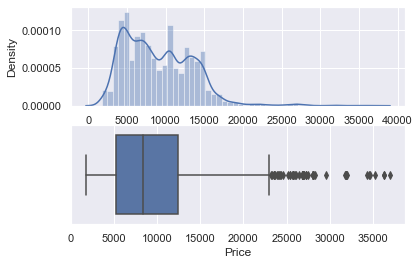

In [61]:
plot(data_train,'Price')

## Data Spliting

In [62]:
X = data_train.drop('Price',axis=1)
y = data_train['Price']

In [63]:
X.dtypes

Airline|Air_India                            uint8
Airline|GoAir                                uint8
Airline|IndiGo                               uint8
Airline|Jet_Airways                          uint8
Airline|Jet_Airways_Business                 uint8
Airline|Multiple_carriers                    uint8
Airline|Multiple_carriers_Premium_economy    uint8
Airline|SpiceJet                             uint8
Airline|Trujet                               uint8
Airline|Vistara                              uint8
Airline|Vistara_Premium_economy              uint8
Source|Chennai                               uint8
Source|Delhi                                 uint8
Source|Kolkata                               uint8
Source|Mumbai                                uint8
Destination|Cochin                           uint8
Destination|Delhi                            uint8
Destination|Hyderabad                        uint8
Destination|Kolkata                          uint8
Destination|New_Delhi          

In [64]:
len(data_train.columns)

36

In [65]:
from sklearn.feature_selection import mutual_info_classif

In [66]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Airline|Air_India,0.744013
Airline|GoAir,0.088529
Airline|IndiGo,0.639421
Airline|Jet_Airways,0.910607
Airline|Jet_Airways_Business,0.004459
Airline|Multiple_carriers,0.567383
Airline|Multiple_carriers_Premium_economy,0.015836
Airline|SpiceJet,0.333247
Airline|Trujet,0.000000
Airline|Vistara,0.204277


In [67]:
imp.columns = ['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route2,2.787178
Route3,2.241921
Total_Stops,2.145522
Route1,2.031890
Arrival_Time_hour,1.852755
Route6,1.802537
Duration_hours,1.790453
Arrival_Time_minute,1.538593
Destination|Cochin,1.536481
Source|Delhi,1.528083


<AxesSubplot:>

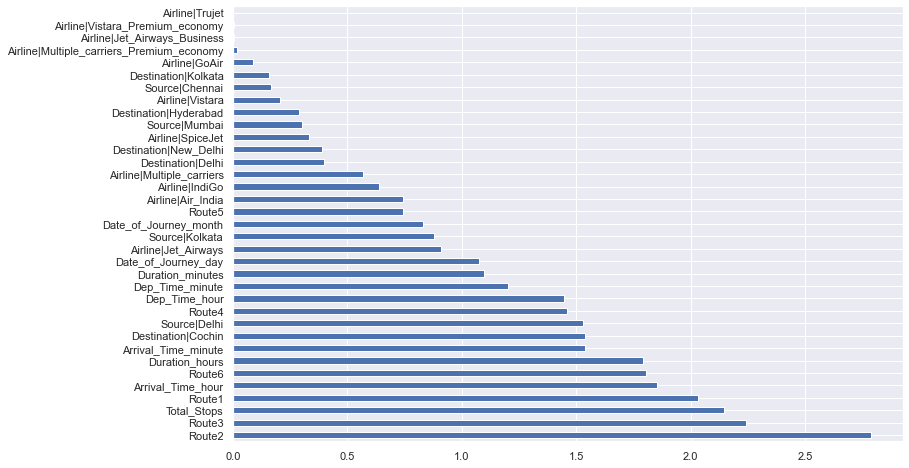

In [68]:
plt.figure(figsize=(12,8))
imp['importance'].nlargest(36).plot(kind='barh')

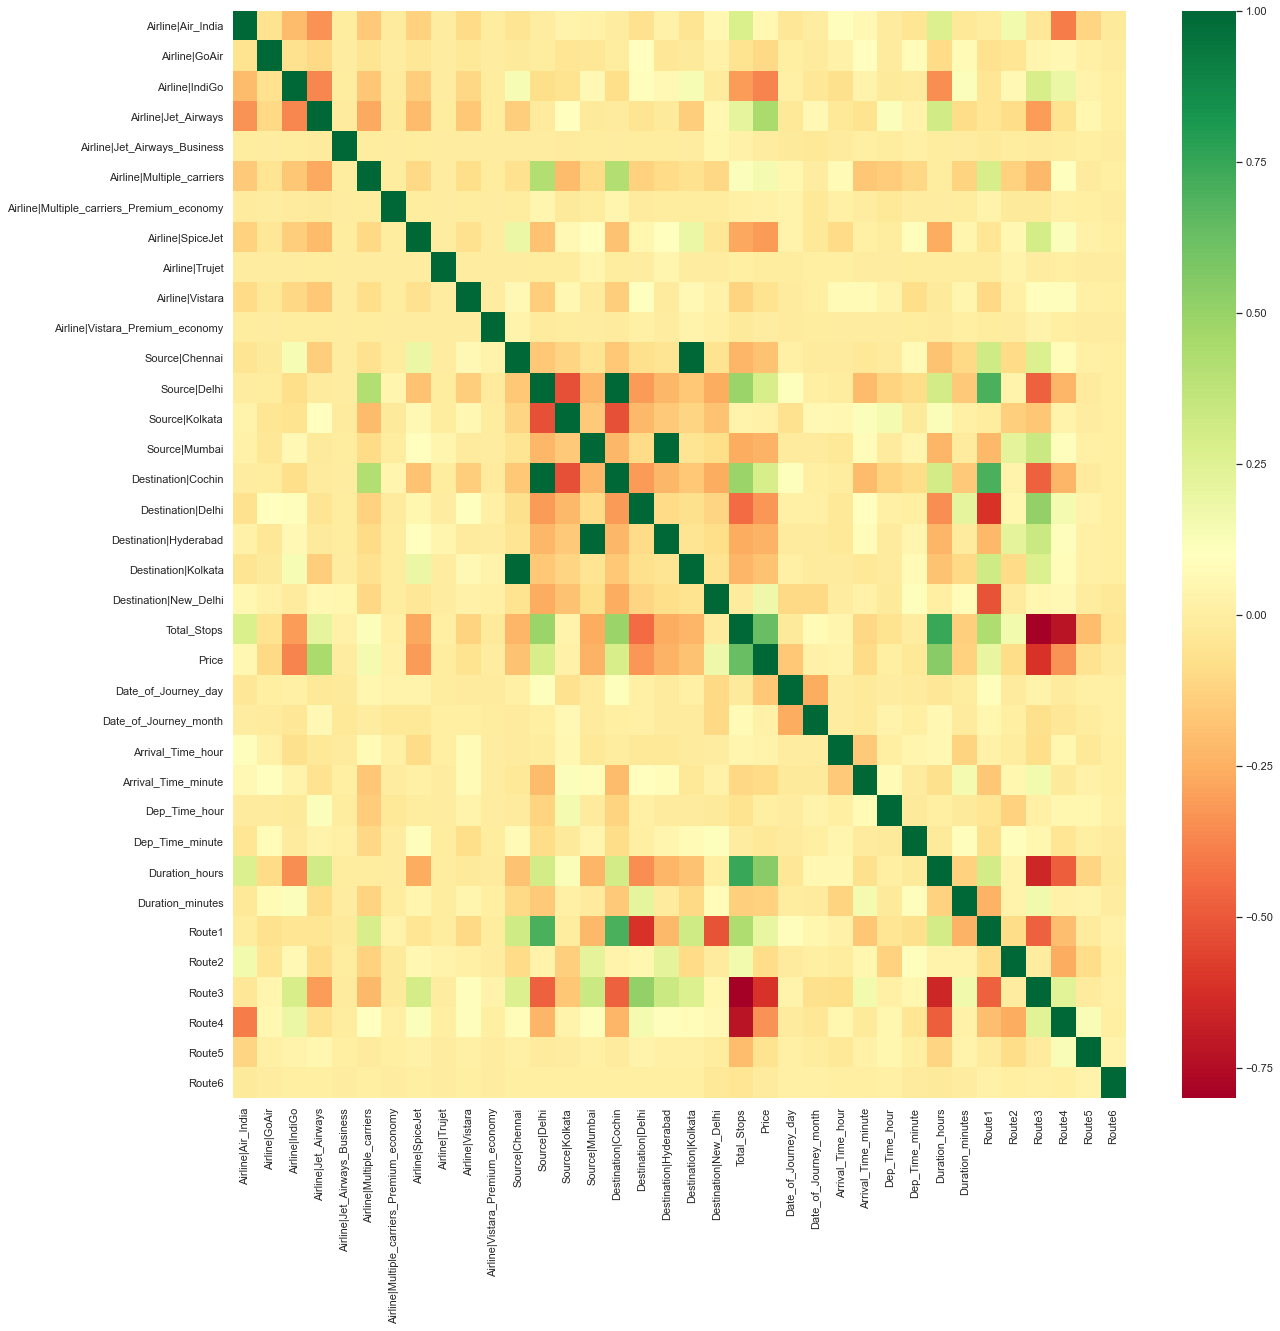

In [69]:
plt.figure(figsize=(20,20))
sns.heatmap(data_train.corr(),annot=False,cmap='RdYlGn')
plt.show()

In [70]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [71]:
selection.feature_importances_

array([9.13031493e-03, 1.12232621e-03, 1.19345568e-02, 1.01085709e-01,
       3.24551505e-04, 2.75660206e-02, 1.12212659e-03, 2.44409809e-03,
       9.87926581e-05, 6.21256419e-03, 1.44990994e-04, 4.41694147e-04,
       2.24301869e-03, 2.75464170e-03, 4.00742762e-03, 2.11241049e-03,
       1.06314333e-03, 3.57777596e-03, 4.47514226e-04, 1.51987164e-02,
       1.61906092e-01, 1.21082672e-01, 8.94702462e-02, 1.72692432e-02,
       1.57485625e-02, 2.00870902e-02, 1.85807185e-02, 6.96385113e-02,
       1.31144031e-02, 8.84345307e-03, 2.35429082e-02, 2.28106174e-01,
       1.91144874e-02, 4.25002730e-04, 3.80414601e-05])

<AxesSubplot:>

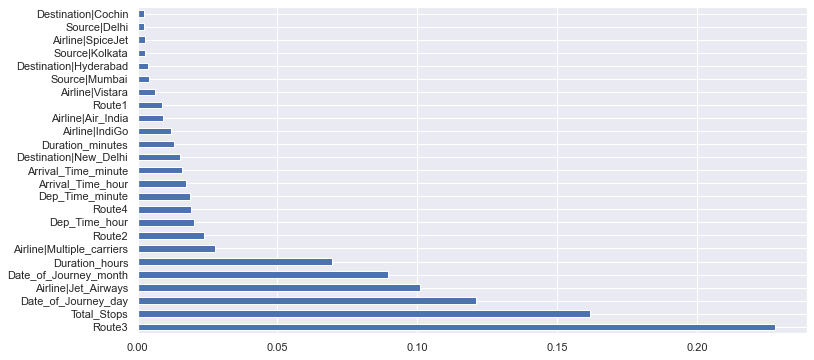

In [76]:
plt.figure(figsize=(12,6))
imp_features = pd.Series(selection.feature_importances_,index=X.columns)
imp_features.nlargest(25).plot(kind='barh')

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pickle

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.22,random_state=19)

In [96]:
def predict(ml_model,dump):
    model = ml_model.fit(X_train,y_train)
    print('Training Score: {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_test)
    print('Test Data: {}'.format(y_test))
    print('Predictions: {}'.format(y_pred))
    print('\n')
    r2_score = metrics.r2_score(y_test,y_pred)
    print('r2 Score: {}'.format(r2_score))
    print('MAE :', metrics.mean_absolute_error(y_test,y_pred))
    print('MSE: ', metrics.mean_squared_error(y_test,y_pred))
    print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    sns.distplot(y_test - y_pred)
    
    if dump == 1:
        file = open('./model.pkl','wb')
        pickle.dump(model,file)

In [92]:
from sklearn.ensemble import RandomForestRegressor

Training Score: 0.9550867623923347
Test Data: 3714     3919.0
4645     3100.0
6688    10368.0
8583     3384.0
4199     8452.0
         ...   
7687     7564.0
7440    14714.0
7846     9916.0
9042    14388.0
1216     5796.0
Name: Price, Length: 2351, dtype: float64
Predictions: [ 3879.15   3138.97  12443.229 ... 11280.82  10645.135  6341.18 ]


r2 Score: 0.8117887684390525
MAE : 1191.7187267678917
MSE:  3579848.347120892
RMSE:  1892.0487168994598


E:\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


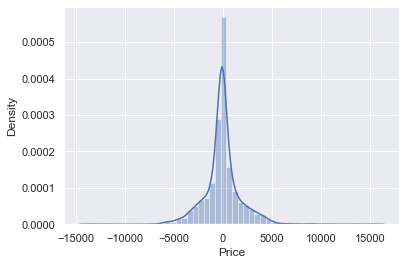

In [97]:
predict(RandomForestRegressor(),1)

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

Training Score: 0.6168814300243559
Test Data: 3714     3919.0
4645     3100.0
6688    10368.0
8583     3384.0
4199     8452.0
         ...   
7687     7564.0
7440    14714.0
7846     9916.0
9042    14388.0
1216     5796.0
Name: Price, Length: 2351, dtype: float64
Predictions: [ 3333.97229914  3604.43562845 14534.91319658 ... 12409.29611407
 11795.70450045  5669.60167663]


r2 Score: 0.6109344971094578
MAE : 1953.6055977685826
MSE:  7400172.061428988
RMSE:  2720.325727082878


E:\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


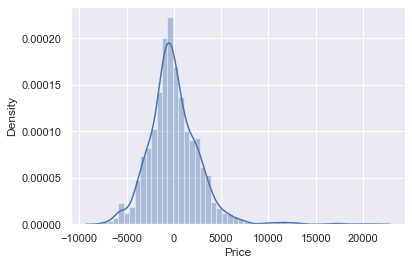

In [99]:
predict(LinearRegression(),0)

Training Score: 0.7780593243006284
Test Data: 3714     3919.0
4645     3100.0
6688    10368.0
8583     3384.0
4199     8452.0
         ...   
7687     7564.0
7440    14714.0
7846     9916.0
9042    14388.0
1216     5796.0
Name: Price, Length: 2351, dtype: float64
Predictions: [ 3881.   3184.8 12651.6 ... 13465.  11493.   5763.2]


r2 Score: 0.6475919702206929
MAE : 1718.7873245427477
MSE:  6702933.148328371
RMSE:  2589.002346141921


E:\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


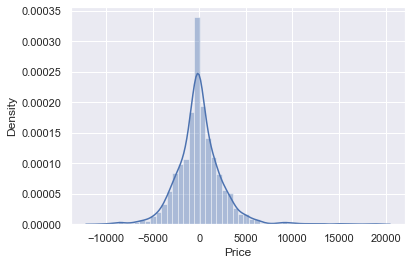

In [100]:
predict(KNeighborsRegressor(),0)

Training Score: 0.954845192246228
Test Data: 3714     3919.0
4645     3100.0
6688    10368.0
8583     3384.0
4199     8452.0
         ...   
7687     7564.0
7440    14714.0
7846     9916.0
9042    14388.0
1216     5796.0
Name: Price, Length: 2351, dtype: float64
Predictions: [ 3892.35    3096.54   12635.478  ... 11272.14   10369.9275  6021.41  ]


r2 Score: 0.8137593184644164
MAE : 1189.8133363254663
MSE:  3542367.7451785263
RMSE:  1882.1178882255294


E:\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


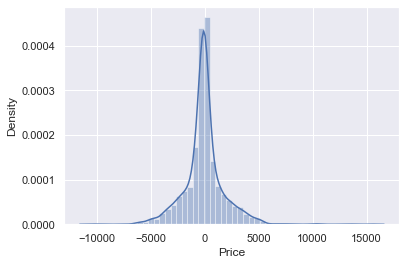

In [101]:
predict(RandomForestRegressor(),1)

Training Score: 0.9686969209229805
Test Data: 3714     3919.0
4645     3100.0
6688    10368.0
8583     3384.0
4199     8452.0
         ...   
7687     7564.0
7440    14714.0
7846     9916.0
9042    14388.0
1216     5796.0
Name: Price, Length: 2351, dtype: float64
Predictions: [ 3971.  3100. 13014. ...  9920.  9663.  4744.]


r2 Score: 0.7113825632503028
MAE : 1353.0801502906565
MSE:  5489612.098755612
RMSE:  2342.9921252013655


E:\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


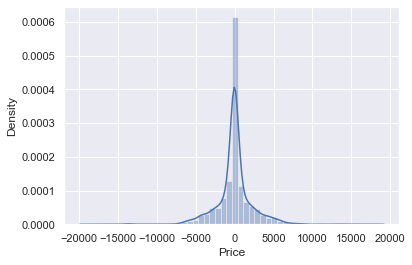

In [102]:
predict(DecisionTreeRegressor(),0)

In [107]:
from sklearn.model_selection import RandomizedSearchCV

In [103]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [104]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [105]:
### initialise your estimator
reg_rf=RandomForestRegressor()

In [108]:
# Random search of parameters, using 3 fold cross validation

rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [109]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [110]:
rf_random.best_params_

{'n_estimators': 760,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 21}

In [113]:
pred = rf_random.predict(X_test)

E:\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

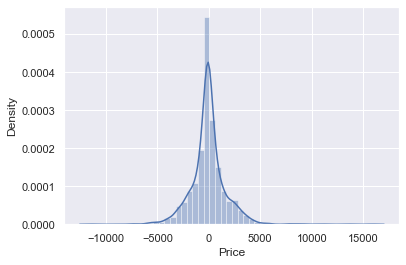

In [114]:
sns.distplot(y_test-pred)

In [116]:
metrics.r2_score(y_test,pred)

0.8429291686523914

In [117]:
print('MAE',metrics.mean_absolute_error(y_test,pred))
print('MSE',metrics.mean_squared_error(y_test,pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE 1123.6048713707967
MSE 2987546.233650552
RMSE 1728.4519760903258


In [118]:
# open a file, where you want to store the data
file=open('rf_random.pkl','wb')

In [119]:
# dump information to that file
pickle.dump(rf_random,file)

In [120]:
model=open('rf_random.pkl','rb')
forest=pickle.load(model)

In [121]:
y_prediction=forest.predict(X_test)

In [122]:
metrics.r2_score(y_test,y_prediction)

0.8429291686523914

## Test set

In [39]:
test_data = pd.read_excel(r"E:\MachineLearning\EDA\Flight_Price\Test_set.xlsx")

In [40]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [41]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)



Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [42]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


---

## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,


1. <span style="color: purple;">**heatmap**</span>
2. <span style="color: purple;">**feature_importance_**</span>
3. <span style="color: purple;">**SelectKBest**</span>

In [43]:
data_train.shape

(10682, 30)

In [44]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [45]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

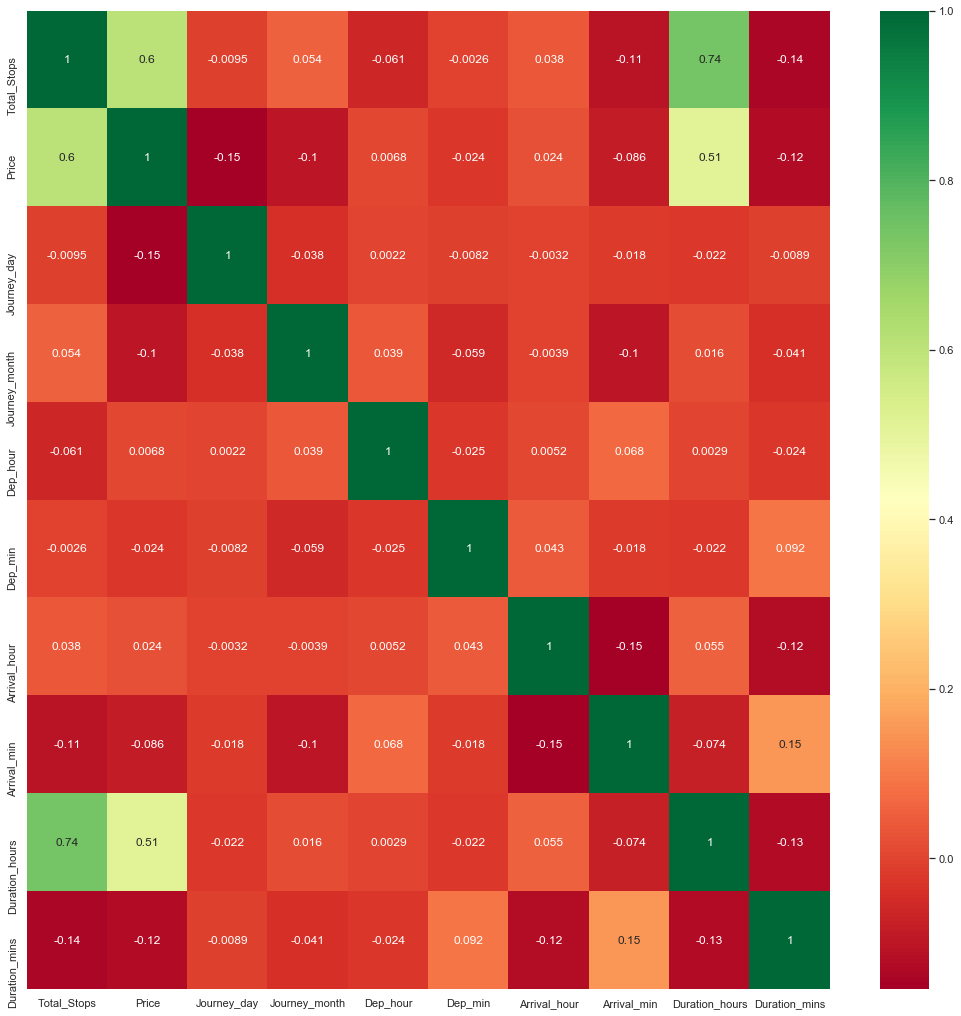

In [47]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [48]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [49]:
print(selection.feature_importances_)

[1.95434120e-01 1.44021586e-01 5.38555703e-02 2.40539410e-02
 2.17430940e-02 2.73470116e-02 1.96095029e-02 1.27500039e-01
 1.74337150e-02 1.06741541e-02 1.87128973e-03 1.65718507e-02
 1.51364596e-01 6.81637760e-02 1.89902192e-02 8.47326514e-04
 3.10615675e-03 1.08644888e-04 5.29446496e-03 9.35369428e-05
 6.27777871e-04 1.23137157e-02 3.24867396e-03 8.91085147e-03
 1.41174133e-02 1.95895945e-02 7.68279226e-03 4.01014841e-04
 2.50235698e-02]


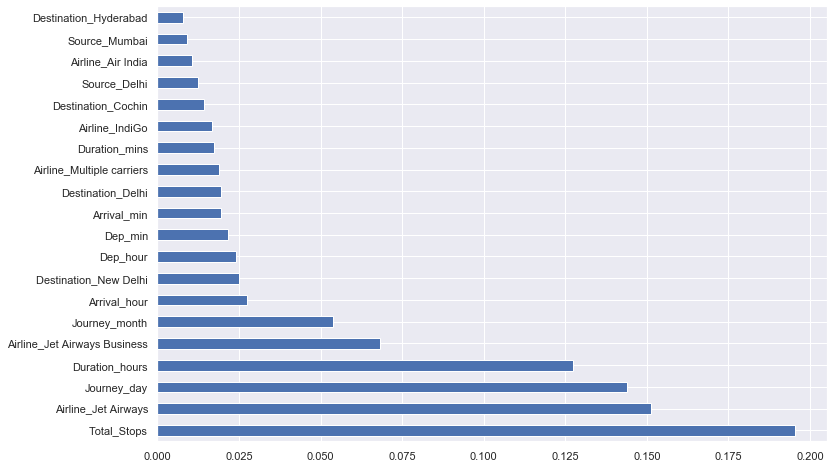

In [50]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


---

## Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check **RSME** Score
7. Plot graph

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [52]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [53]:
y_pred = reg_rf.predict(X_test)

In [54]:
reg_rf.score(X_train, y_train)

0.9539164511170628

In [55]:
reg_rf.score(X_test, y_test)

0.798383043987616

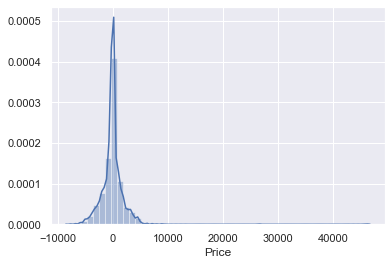

In [56]:
sns.distplot(y_test-y_pred)
plt.show()

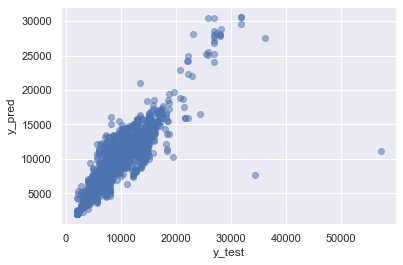

In [57]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [58]:
from sklearn import metrics

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1172.5455945373583
MSE: 4347276.1614450775
RMSE: 2085.0122688955757


In [60]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [61]:
metrics.r2_score(y_test, y_pred)

0.7983830439876158

---

## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [64]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [65]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [66]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  13.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  11.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  11.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  12.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  10.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  18.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 12.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [67]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [69]:
prediction = rf_random.predict(X_test)

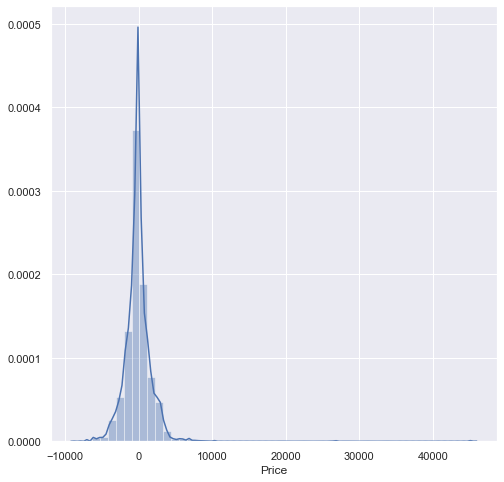

In [70]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

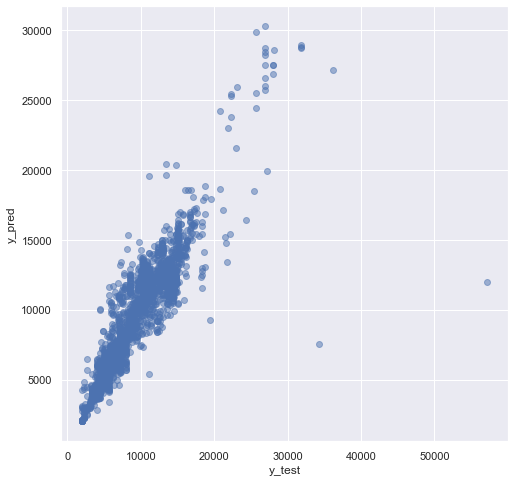

In [71]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [72]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1165.606162629916
MSE: 4062650.6911608884
RMSE: 2015.6018186042818


---

## Save the model to reuse it again

In [62]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [63]:
model = open('flight_price_rf.pkl','rb')
forest = pickle.load(model)

In [64]:
y_prediction = forest.predict(X_test)

In [65]:
metrics.r2_score(y_test, y_prediction)

0.8117443234361064

---